In [1]:
import scanpy as sc
import seaborn as sns
from muon import atac as ac
import matplotlib.pyplot as plt

/Users/dominik.klein/opt/anaconda3/envs/mm_best_muon_full/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata = sc.read_h5ad("/Users/dominik.klein/data/E14-E15_adata_filtered_rmDoublets_sctNormalized_WNN_embedded_initialAnno_new_annotation.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 16978 × 14663
    obs: 'n_counts', 'sample', 'int_id', 'reporter', 'log_cell_probs', 'cell_barcodes_du', 'cell_barcodes_cr', 'cell_barcodes', 'log_counts', 'n_genes', 'log_genes', 'mt_frac', 'rp_frac', 'ambi_frac', 'total_counts_rank', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'log_nCount_ATAC', 'log_nFeature_ATAC', 'scrublet_scores', 'scrublet_doublets', 'scrublet_doublets_cat', 'dd_doublets', 'dd_scores', 'dd_log_p_values', 'dd_voting_average', 'dd_-log_p_values', 'dd_doublets_cat', 'pANN', 'DF_classifications_1', 'DF_classifications_2', 'pANN_SCT', 'DF_SCT_classifications_1', 'DF_SCT_classifications_2', 'df_doublets',

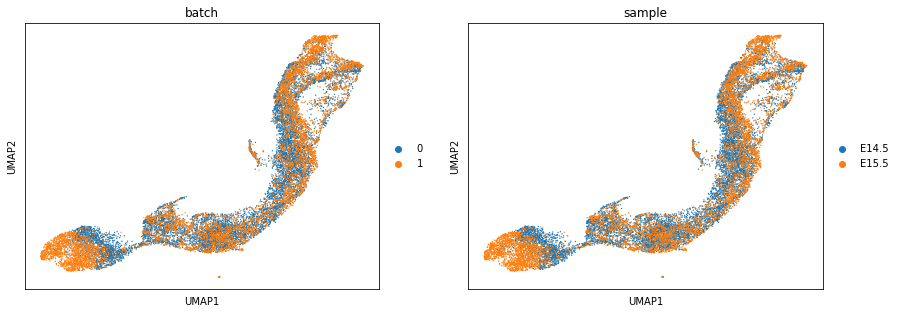

In [4]:
sc.pl.umap(adata, color=["batch", "sample"]) # as in previous notebook we see `batch` and `sample` are bijective

In [5]:
adata.obsm["X_umap_paga"] = adata.obsm["X_umap"].copy()

In [7]:
sc.tl.umap(adata)
adata.obsm["X_umap"] = adata.obsm["X_umap"].copy()

UMAP based on WNN

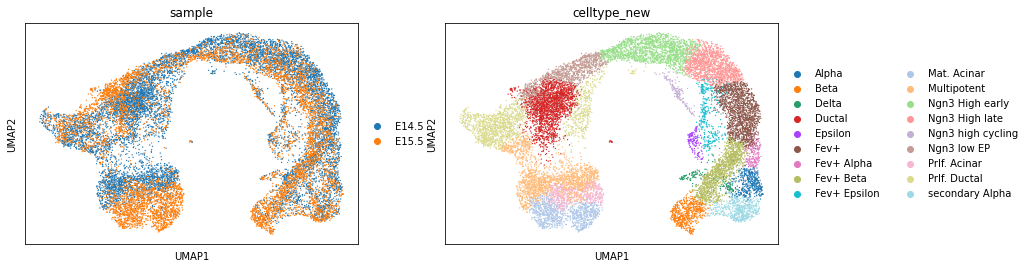

In [9]:
sc.pl.umap(adata, color=["sample", "celltype_new"])

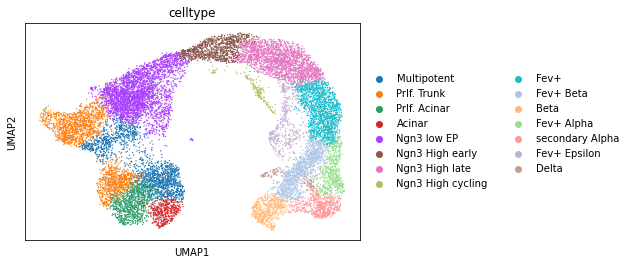

In [10]:
sc.pl.embedding(adata, basis="umap", color=["celltype"])

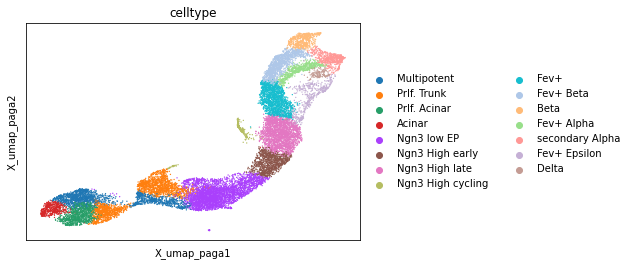

In [11]:
sc.pl.embedding(adata, basis="X_umap_paga", color=["celltype"])

In [10]:
adata.write("/storage/groups/ml01/workspace/dominik.klein/scMultiome_NVF/scMultiome_NVF_E14-E15/E14-E15_adata_GEX_with_umap.h5ad")

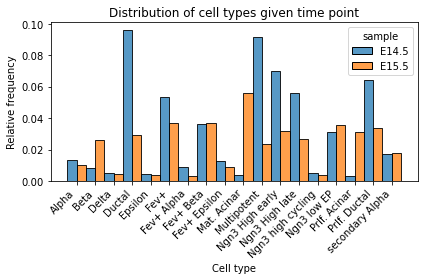

In [12]:
# In order for OT to work we need to see a shift in distribution

sns.histplot(data=adata.obs, x="celltype_new", hue="sample", multiple='dodge', stat = 'probability')
plt.xlabel("Cell type")
plt.ylabel("Relative frequency")
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of cell types given time point")
plt.tight_layout()

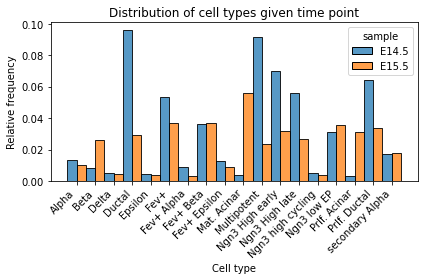

In [16]:
sns.histplot(data=adata.obs, x="celltype_new", hue="sample", multiple='dodge', stat = 'density')
plt.xlabel("Cell type")
plt.ylabel("Relative frequency")
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of cell types given time point")
plt.tight_layout()

In [ ]:
adata.obs

In [24]:
df["sample"]

AAACAGCCAACAGCCT-1-0    E14.5
AAACAGCCAACCCTCC-1-0    E14.5
AAACAGCCACCTGTAA-1-0    E14.5
AAACAGCCACTAAGCC-1-0    E14.5
AAACAGCCAGGATAAC-1-0    E14.5
                        ...  
TTTGTGTTCTTGTTCG-1-1    E15.5
TTTGTTGGTATTGAGT-1-1    E15.5
TTTGTTGGTCCTAAGA-1-1    E15.5
TTTGTTGGTTAACAGT-1-1    E15.5
TTTGTTGGTTGTTGCT-1-1    E15.5
Name: sample, Length: 16978, dtype: category
Categories (2, object): ['E14.5', 'E15.5']

In [28]:
x,y = 'sample', 'celltype_new'
df = adata.obs.copy()
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()


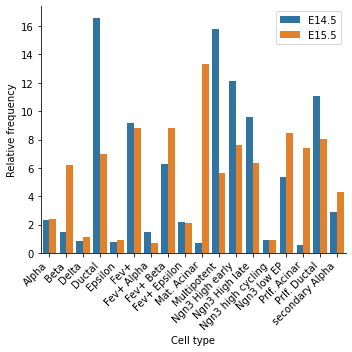

In [44]:
g = sns.catplot(x="level_1",y='percent',hue=x,kind='bar',data=df1, legend=False)
plt.xlabel("Cell type")
plt.ylabel("Relative frequency")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()

#### Differentiably expressed genes

In [56]:
import numpy as np
adata.layers["sct_counts"].max()

2515.0

In [62]:
sc.tl.rank_genes_groups(adata, "celltype", method="t-test_overestim_var")

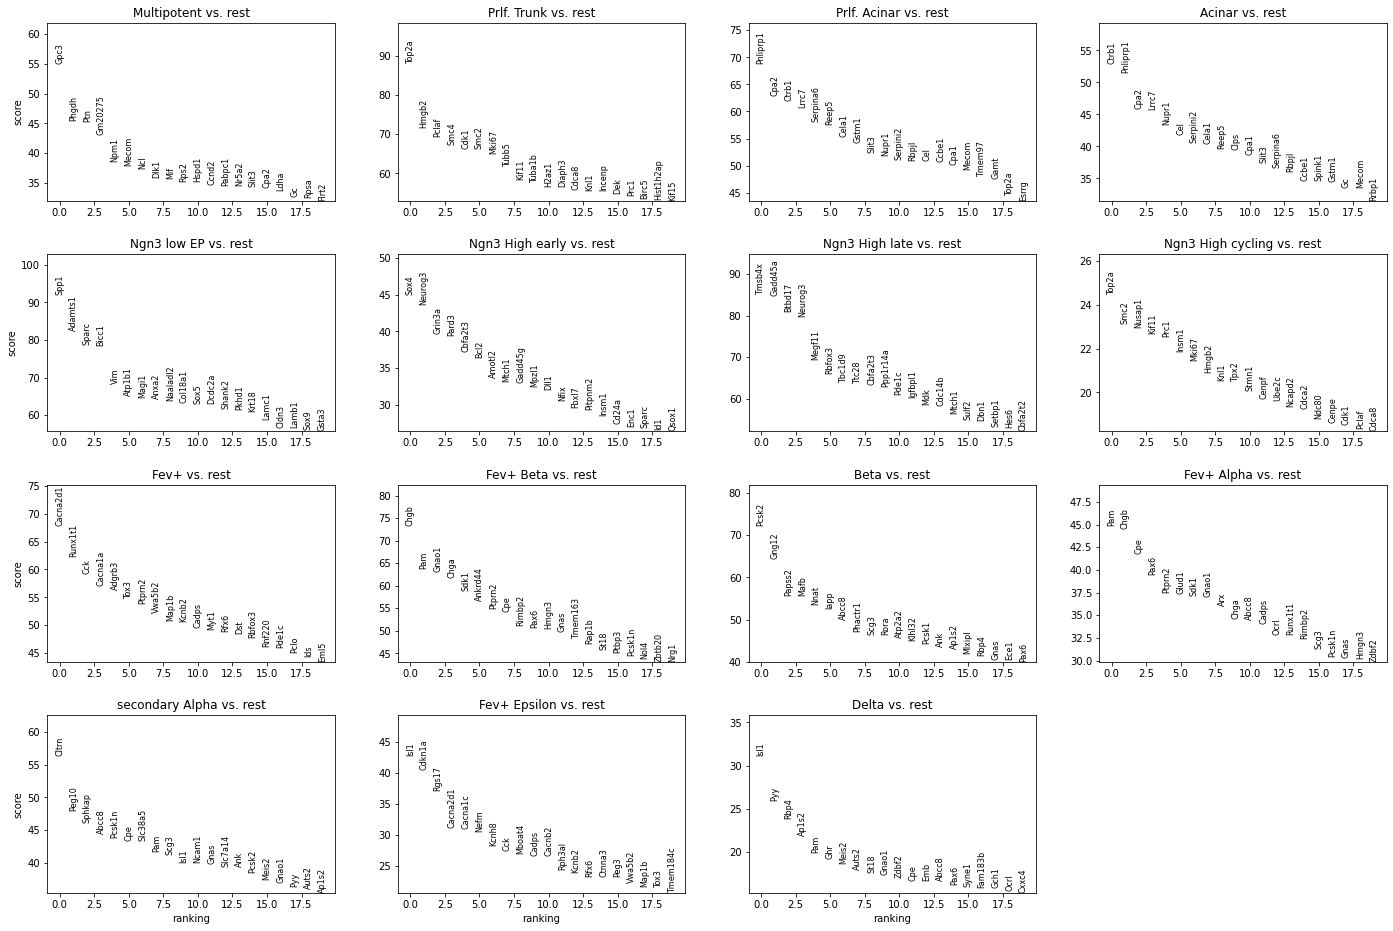

In [24]:
sc.pl.rank_genes_groups(adata, sharey=False)

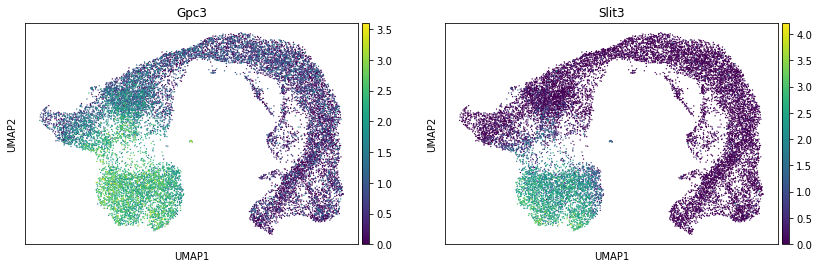

In [72]:
sc.pl.umap(adata, color=["Gpc3", "Slit3"]) # left most differentiably expressed gene accordind to scanpy, right scVI

For scVI we only perform differential expression on the 2000 most highly variable genes, so we want to restrict to the same set here

In [75]:
adata_reduced = adata.copy()

In [76]:
sc.pp.highly_variable_genes(adata_reduced, n_top_genes=2000, subset=True)

In [78]:
sc.tl.rank_genes_groups(adata_reduced, "celltype", method="t-test_overestim_var")

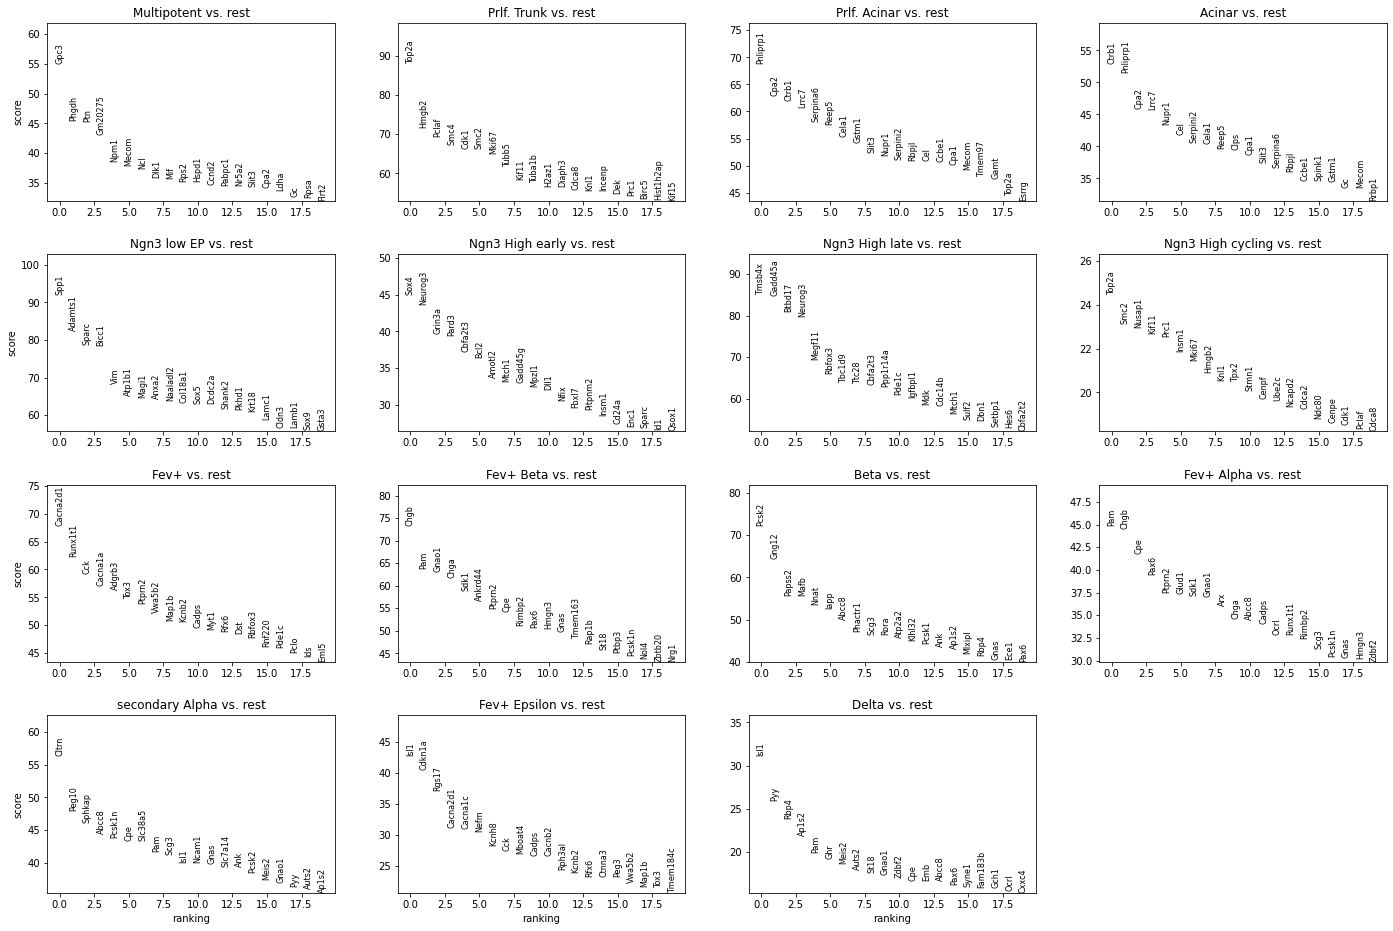

In [80]:
sc.pl.rank_genes_groups(adata_reduced, sharey=False)

In [79]:
#sc.tl.rank_genes_groups(adata, "celltype", groups=["Fev+ Alpha", "Beta"], method="t-test_overestim_var")

## ATAC

In [37]:
bdata = sc.read_h5ad("/storage/groups/ml01/workspace/dominik.klein/scMultiome_NVF/scMultiome_NVF_E14-E15/E14-E15_ATAC_annotated.h5ad")
del bdata.obsm["LSI"]["old_index"]

In [38]:
bdata

AnnData object with n_obs × n_vars = 16978 × 261915
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'doublet_calls', 'final_doublets', 'final_doublets_cat', 'nCount_peaks', 'nFeature_peaks', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'peaks.weight', 'sample', 'ident', 'old_index', 'celltype'
    var: 'count', 'percentile'
    uns: 'X_name'
    obsm: 'LSI', 'UMAP.ATAC'
    layers: 'logcounts'

In [39]:
bdata.obsm["umap_ATAC"] = bdata.obsm["UMAP.ATAC"][["atacUMAP_1", "atacUMAP_2"]].values

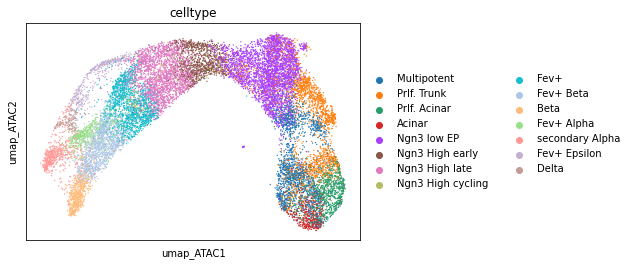

In [40]:
sc.pl.embedding(bdata, basis="umap_ATAC", color="celltype")

In [41]:
sc.pp.neighbors(bdata, use_rep="LSI", key_added="LSI_neighbors")
sc.tl.umap(bdata, neighbors_key="LSI_neighbors", key_added="LSI_umap")

In [42]:
bdata

AnnData object with n_obs × n_vars = 16978 × 261915
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'doublet_calls', 'final_doublets', 'final_doublets_cat', 'nCount_peaks', 'nFeature_peaks', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'peaks.weight', 'sample', 'ident', 'old_index', 'celltype'
    var: 'count', 'percentile'
    uns: 'X_name', 'celltype_colors', 'LSI_neighbors', 'umap'
    obsm: 'LSI', 'UMAP.ATAC', 'umap_ATAC', 'LSI_umap_umap'
    layers: 'logcounts'
    obsp: 'LSI_neighbors_distances', 'LSI_neighbors_connectivities'

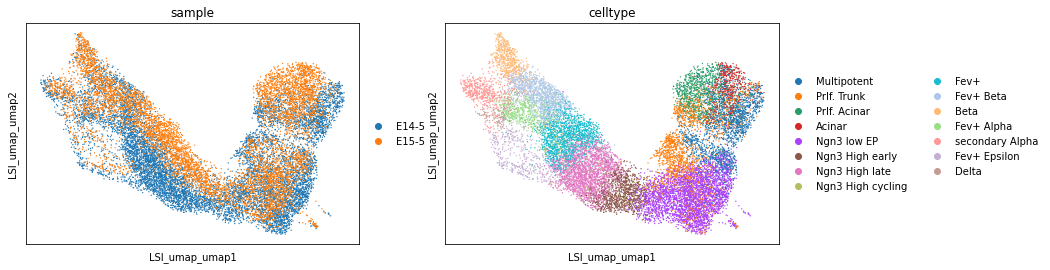

In [43]:
# does not look alike, why?
sc.pl.embedding(bdata, basis="LSI_umap_umap" ,color=["sample", "celltype"])

In [45]:
ac.tl.rank_peaks_groups(bdata, "celltype", method="t-test_overestim_var")
ac.pl.rank_genes_groups(bdata, sharey=False)

KeyError: 'There is no peak annotation yet. Run muon.atac.pp.add_peak_annotation first.'

In [46]:
bdata

AnnData object with n_obs × n_vars = 16978 × 261915
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'doublet_calls', 'final_doublets', 'final_doublets_cat', 'nCount_peaks', 'nFeature_peaks', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'peaks.weight', 'sample', 'ident', 'old_index', 'celltype'
    var: 'count', 'percentile'
    uns: 'X_name', 'celltype_colors', 'LSI_neighbors', 'umap', 'sample_colors', 'rank_genes_groups'
    obsm: 'LSI', 'UMAP.ATAC', 'umap_ATAC', 'LSI_umap_umap'
    layers: 'logcounts'
    obsp: 'LSI_neighbors_distances', 'LSI_neighbors_connectivities'

In [ ]:
bdata.write("/storage/groups/ml01/workspace/dominik.klein/scMultiome_NVF/scMultiome_NVF_E14-E15/E14-E15_ATAC_annotated_with_umap.h5ad")

In [39]:
bdata.obsm["LSI"]

,LSI_1,LSI_2,LSI_3,LSI_4,LSI_5,LSI_6,LSI_7,LSI_8,LSI_9,LSI_10,...,LSI_42,LSI_43,LSI_44,LSI_45,LSI_46,LSI_47,LSI_48,LSI_49,LSI_50,old_index
index_adapted,,,,,,,,,,,,,,,,,,,,,
AAACAGCCAACAGCCT-1-0,-0.367453,1.176745,-1.066015,0.168645,-0.421614,0.939636,-0.412283,-0.237719,1.175191,-0.548845,...,0.466481,-0.851715,-0.413442,-0.127468,-0.451580,1.430079,-0.287410,0.256423,-0.994026,E14-5_AAACAGCCAACAGCCT-1
AAACAGCCAACCCTCC-1-0,0.853237,2.041713,-0.390761,-0.237275,1.035392,2.467354,-0.330092,-0.494833,1.965809,1.143400,...,-0.062806,-0.558291,-0.693441,0.175507,-0.571740,0.760353,1.076140,0.288795,2.615270,E14-5_AAACAGCCAACCCTCC-1
AAACAGCCACCTGTAA-1-0,0.087230,-0.850540,-0.173511,1.704891,-0.451223,0.287467,-1.091486,0.475872,-1.186695,-1.338789,...,-0.499355,0.451770,0.201908,0.167872,0.259005,0.531440,-0.832418,0.601423,0.440945,E14-5_AAACAGCCACCTGTAA-1
AAACAGCCACTAAGCC-1-0,0.442666,1.236429,-0.322197,-0.004243,0.523756,2.192623,-0.179740,-2.410495,0.665224,-1.143150,...,-0.389584,0.388717,0.096772,0.032132,-0.575278,-1.143345,0.346009,-0.115406,-2.426751,E14-5_AAACAGCCACTAAGCC-1
AAACAGCCAGGATAAC-1-0,-1.734913,-0.018633,0.644896,0.043468,-1.102971,-0.793610,-0.408721,-0.312182,0.817959,-0.377241,...,-0.102288,0.533324,-0.081987,-0.223135,0.320319,0.006709,-0.301907,0.173157,-0.015111,E14-5_AAACAGCCAGGATAAC-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCTTGTTCG-1-1,-0.057191,-1.284456,-0.615206,-1.780917,-0.285760,0.495705,-0.336480,-0.191958,-0.797730,2.553899,...,1.892173,-1.060016,-0.115712,-0.312758,-1.074754,0.119214,-0.269958,-0.080801,-0.963439,E15-5_TTTGTGTTCTTGTTCG-1
TTTGTTGGTATTGAGT-1-1,-0.947099,-0.583598,0.052855,-0.169321,-1.635998,-0.077792,0.031481,-0.309025,0.274710,0.015086,...,0.301130,-0.212259,-0.057083,-0.529897,0.073134,-0.394389,-0.038660,0.130101,-0.323583,E15-5_TTTGTTGGTATTGAGT-1
TTTGTTGGTCCTAAGA-1-1,-1.456949,-0.808764,-0.413590,-0.701155,-1.278186,0.570339,-0.546207,-0.247130,-0.741127,1.097118,...,0.491392,-0.149753,-0.199868,0.493465,-0.496068,0.071812,0.147434,0.842824,-0.664854,E15-5_TTTGTTGGTCCTAAGA-1


In [43]:
del bdata.obsm["LSI"]["old_index"]
sc.pp.neighbors(bdata, use_rep="LSI")


In [45]:
sc.tl.umap(bdata)

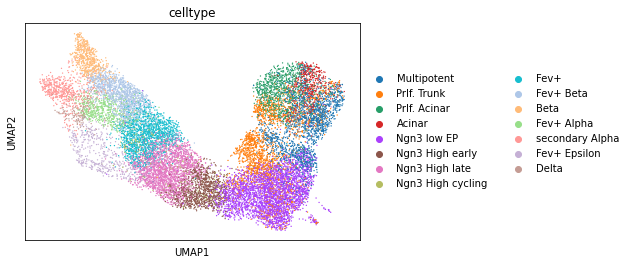

In [47]:
sc.pl.umap(bdata, color="celltype")